# Moran

In [15]:
from glob import glob
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fmin_bfgs, fmin_l_bfgs_b, fmin_slsqp
r = sp.var("r")
p = sp.var("p")
from scipy.optimize import minimize as sminimize

def id2el(Id):
    """Constructs the graph associated to the number Id.
    """
    el = []

    Id = int(Id)

    mask = int(1)
    u = int(0)
    v = int(1)
    while u < 10:
        if (Id & mask):
            el.append((u,v))
    
        mask = (mask << int(1))
        v += int(1)
    
        if v > 10:
            u += 1
            v = u+1
    return el
id2G  = lambda Id : nx.from_edgelist (id2el(np.uint64(Id)))
IDs = [17586207775, 17449355267, 17450410000, 17450930177, 17586206722, 17585676289, 17450405892, 17584623620, 17585676292, 17586204679, 17585676296, 17450934280, 17449885704, 17450409992, 270016520, 17450404872, 17450411020, 17585679375, 17586207760, 17585680400, 17584628752, 17449356304, 17584624656, 17585678352, 17315667984, 17317242900, 405811224, 17585680408, 17586207768, 406338584, 17451990044, 406337562, 17586206747, 17586207772, 17586207774, 270020632, 17183553564, 17451989020, 17586206748, 17585679388, 17585681428, 17586206744, 406337560, 17449891866, 17586206746, 17586206736, 17586204697, 17584109586, 17586206738, 17450405896, 17450930185, 17583574032, 17584625666, 17585671192, 17450932235, 17586200577, 17449883664, 17451980816, 17316714512, 17317240836, 17316192260, 17451980817, 17450408974, 17586200584, 406331400, 17584627720, 405807112, 17449885705, 17586200585, 406331401, 17449884688, 17585675280, 17182496792, 17584628744, 17584627728, 17584103440, 17586200592, 17449885712, 17585676304, 17585676305, 17586200593, 17450933272, 17585151000, 17449886732, 17584628748, 17584104464, 17584629770, 17585678346, 17585678348, 17451460620, 17585156098, 17585680388, 17586204676, 17451461644, 17449889798, 17585678355, 17586204678, 17585156104, 17585679376, 17585681412, 17317767192, 17586204688, 405811216, 17585679384, 17585680404, 17451986964, 17586204692, 137900052, 17586204696, 17449889816, 406335512, 406335513]

In [9]:
maxs = []

def parseFile(filename):
    with open(filename, "rt") as infile:
        X = {}
        for line in infile:
            name, val = line.split("=")
            val = sage_eval(val, locals={'r':r, 'p':p})
            X[name.strip()] = val
        edge_list = X['G']
        f = lambda a : -n(X['moran_unconditional_mean_time_from1'](r=QQ(a[0])))
        uT = sminimize(f, np.array([1]), method='L-BFGS-B', bounds=[(float(0), float(10))], tol=float(1e-12))
        f = lambda a : -n(X['moran_conditional_mean_time_from1'](r=QQ(a[0])))
        cT = sminimize(f, np.array([1]), method='L-BFGS-B', bounds=[(float(0), float(10))], tol=float(1e-12))
        return [edge_list, (-uT.fun, uT.x[0]), (-cT.fun, cT.x[0])]

for filename in glob("bivariate/*.sage"):
    print(filename)
    maxs.append(parseFile(filename))    

bivariate/72.sage
bivariate/57.sage
bivariate/66.sage
bivariate/49.sage
bivariate/11.sage
bivariate/35.sage
bivariate/2.sage
bivariate/24.sage
bivariate/52.sage
bivariate/82.sage
bivariate/107.sage
bivariate/78.sage
bivariate/20.sage
bivariate/47.sage
bivariate/104.sage
bivariate/59.sage
bivariate/75.sage
bivariate/8.sage
bivariate/101.sage
bivariate/27.sage
bivariate/100.sage
bivariate/7.sage
bivariate/50.sage
bivariate/77.sage
bivariate/1.sage
bivariate/9.sage
bivariate/69.sage
bivariate/103.sage
bivariate/106.sage
bivariate/21.sage
bivariate/44.sage
bivariate/32.sage
bivariate/81.sage
bivariate/13.sage
bivariate/16.sage
bivariate/54.sage
bivariate/46.sage
bivariate/90.sage
bivariate/33.sage
bivariate/99.sage
bivariate/55.sage
bivariate/89.sage
bivariate/64.sage
bivariate/6.sage
bivariate/10.sage
bivariate/39.sage
bivariate/105.sage
bivariate/67.sage
bivariate/56.sage
bivariate/51.sage
bivariate/48.sage
bivariate/14.sage
bivariate/74.sage
bivariate/91.sage
bivariate/79.sage
bivariate

In [21]:
with open("maximos.txt", "wt") as outfile:
    print(maxs, file=outfile)

with open("/home/alvaro/git/fpExplorer/data/maxtimes.csv", "wt") as outfile:
    print("ID,rmaxUT,maxUT,rmaxCT,maxCT,isothermal,degree_std", file=outfile)
    for el, a, b in maxs:
        G = nx.from_edgelist(el)
        for ID in IDs:
            if nx.is_isomorphic(G, id2G(ID)):
                print(ID,end=",", file=outfile)
                break
        std = np.std([ d for k,d in G.degree() ])
        print(a[1], a[0], b[1], b[0], 1 if std == 0 else 0, std, sep=",", file=outfile)
            

DegreeView({0: 3, 3: 4, 4: 4, 5: 4, 1: 3, 2: 2})

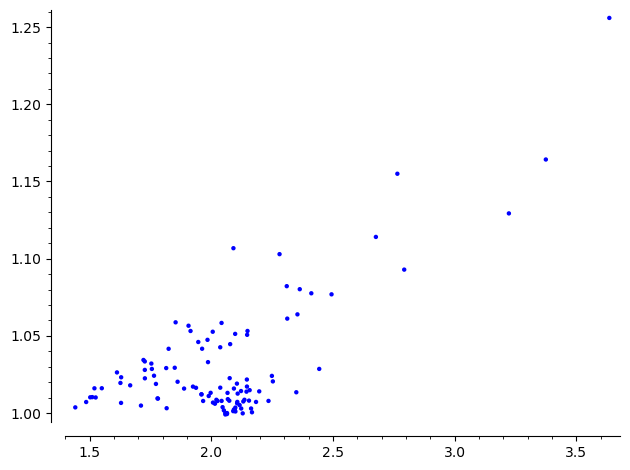

In [12]:
list_plot([ (ut[1], ct[1]) for el, ut, ct in maxs])
    